In [1]:
import numpy as np
import math

from scipy.linalg import solve_triangular as scipy_solve_triangular
from scipy.linalg import qr as sp_qr
from scipy.linalg import solve_triangular as sp_solve_triangular
from scipy.sparse.linalg import SuperLU as sp_SuperLU
from scipy.sparse.linalg import cg as sp_cg
import scipy.sparse as sps

import jlinops


from jlinops import MatrixLinearOperator, _CustomLinearOperator 
from jlinops import banded_cholesky
from jlinops import DiagonalOperator
from jlinops import Neumann2D
from jlinops import dct_sqrt_pinv, dct_pinv
from jlinops import cg
from jlinops import issparse, tosparse, get_device
from jlinops import QRPinvOperator


from jlinops import CUPY_INSTALLED
if CUPY_INSTALLED:
    import cupy as cp
    from cupyx.scipy.linalg import solve_triangular as cp_solve_triangular
    from cupy.linalg import qr as cp_qr
    from cupyx.scipy.sparse.linalg import SuperLU as cp_SuperLU



import matplotlib.pyplot as plt

# With uniform spikes

In [2]:
N = 200

In [3]:
w = np.random.uniform(low=1, high=50, size=2*N*N)
Apinv = jlinops.CGWeightedNeumann2DPinvOperator((N,N), 1.0/np.sqrt(w) , tol=1e-4)
R = Neumann2D((N,N))
WR = DiagonalOperator(1.0/np.sqrt(w)) @ R 

In [4]:
it_counts = []
for j in range(50):
    
    # Initialize a counter for the iterations
    iteration_count = 0

    # Define the callback function
    def callback(xk):
        global iteration_count
        iteration_count += 1

    v = np.random.normal(size=2*N*N)
    _ = sp_cg(Apinv.Rwpinv.C, Apinv.Rwpinv.A.T @ v, callback=callback, M=Apinv.Rwpinv.Mpinv)

    it_counts.append(iteration_count)
    #print(iteration_count)

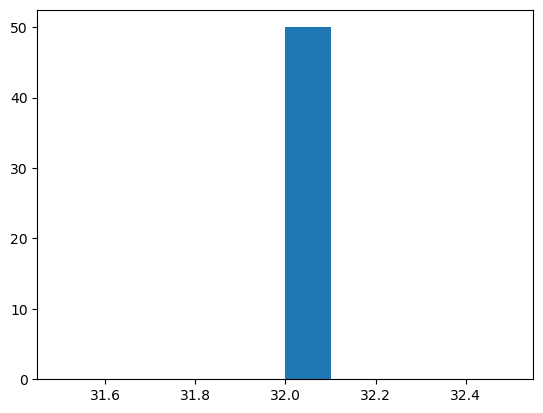

In [5]:
plt.hist(it_counts)
plt.show()

In [101]:
np.mean(it_counts)

32.0

In [102]:
w = np.random.uniform(low=1, high=50, size=2*N*N)
Apinv = jlinops.CGWeightedNeumann2DPinvOperator((N,N), 1.0/np.sqrt(w) , tol=1e-4)
R = Neumann2D((N,N))
WR = DiagonalOperator(1.0/np.sqrt(w)) @ R 
# WR_mat = jlinops.black_box_to_dense(WR)
# WRpinv = np.linalg.pinv(WR_mat)

In [103]:
it_counts = []
for j in range(50):
    
    # Initialize a counter for the iterations
    iteration_count = 0

    # Define the callback function
    def callback(xk):
        global iteration_count
        iteration_count += 1

    v = np.random.normal(size=2*N*N)
    _ = sp_cg(WR.T @ WR, WR.T @ v, callback=callback)

    it_counts.append(iteration_count)
    #print(iteration_count)

In [52]:
np.mean(it_counts)

356.24

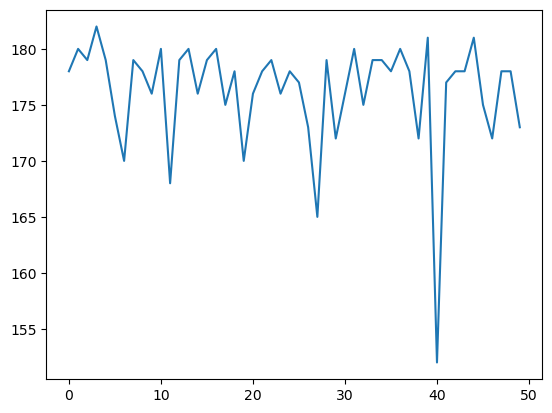

In [44]:
plt.plot(it_counts)
plt.show()

# Again but different spike model

In [84]:
w = np.random.choice([1e-1, 1e0], size=2*N*N, p=[0.9, 0.1])
Apinv = jlinops.CGWeightedNeumann2DPinvOperator((N,N), 1.0/np.sqrt(w) , tol=1e-3)
R = Neumann2D((N,N))
WR = DiagonalOperator(1.0/np.sqrt(w)) @ R 
# WR_mat = jlinops.black_box_to_dense(WR)
# WRpinv = np.linalg.pinv(WR_mat)

In [85]:
it_counts = []
for j in range(50):
    
    # Initialize a counter for the iterations
    iteration_count = 0

    # Define the callback function
    def callback(xk):
        global iteration_count
        iteration_count += 1

    v = np.random.normal(size=2*N*N)
    sol, _ = sp_cg(Apinv.Rwpinv.C, Apinv.Rwpinv.A.T @ v, callback=callback, tol=1e-8)

    resid_norm = np.linalg.norm( ( (WR.T @ WR) @ sol ) - ( WR.T @ v )  )
    print(resid_norm)

    it_counts.append(iteration_count)
    #print(iteration_count)

2.8334473709560613e-06
2.9272487122161363e-06
2.8712513831263615e-06
3.0167193323739914e-06
2.7510822520100494e-06
2.9651837698420824e-06
3.017895592486503e-06
2.8137935289279283e-06
2.8418139594844478e-06
2.926109038878806e-06
2.7852310094616242e-06
2.926980516665372e-06
2.901479893833365e-06
2.757030785671322e-06
2.948763729577709e-06
2.6305385900793137e-06
2.678814888313251e-06
2.7678613279597237e-06
2.8891380981767126e-06
2.763262873320767e-06
2.9489073357231356e-06
2.9189393784869267e-06
2.9704012941928883e-06
2.829950405091848e-06
3.078701445184335e-06
2.919537123827105e-06
2.8054562762825696e-06
3.0468575427012225e-06
2.945334054119827e-06
2.820399501271154e-06
2.9893054326236103e-06
2.688013097813634e-06
2.651915649025482e-06
2.5938023027445946e-06
2.944903085014398e-06
2.7673279409926602e-06
2.8650969102524373e-06
3.064588059987632e-06
2.6809552489825134e-06
2.8673789486781936e-06
2.7664499285352894e-06
2.6224446590932376e-06
2.919765462387628e-06
2.816851012687507e-06
2.87003

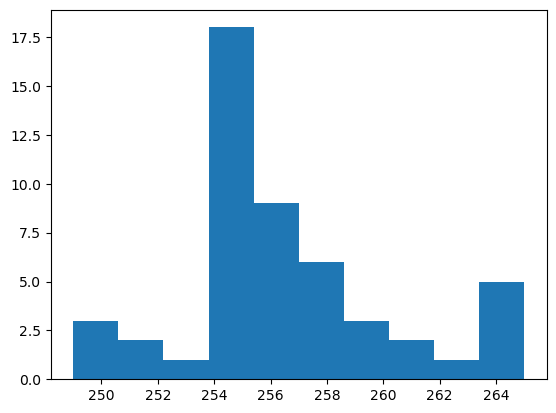

In [86]:
plt.hist(it_counts)
plt.show()

In [87]:
w = np.random.choice([1e-1, 1e0], size=2*N*N, p=[0.9, 0.1])
Apinv = jlinops.CGWeightedNeumann2DPinvOperator((N,N), 1.0/np.sqrt(w) , tol=1e-4)
R = Neumann2D((N,N))
WR = DiagonalOperator(1.0/np.sqrt(w)) @ R 
# WR_mat = jlinops.black_box_to_dense(WR)
# WRpinv = np.linalg.pinv(WR_mat)

In [88]:
it_counts = []
for j in range(50):
    
    # Initialize a counter for the iterations
    iteration_count = 0

    # Define the callback function
    def callback(xk):
        global iteration_count
        iteration_count += 1

    v = np.random.normal(size=2*N*N)
    sol, _ = sp_cg(WR.T @ WR, WR.T @ v, callback=callback, tol=1e-8)

    resid_norm = np.linalg.norm( ( (WR.T @ WR) @ sol ) - ( WR.T @ v )  )
    print(resid_norm)

    it_counts.append(iteration_count)
    #print(iteration_count)

2.8552970386560245e-06
2.860836805999005e-06
2.8208212453632336e-06
2.763230371573549e-06
2.638057775331236e-06
2.8499581544939365e-06
2.5374427107107523e-06
2.8156681434003753e-06
2.5445630212921588e-06
2.943937297455938e-06
2.8957178123106386e-06
2.9760135250960305e-06
2.874424576674844e-06
2.919276278081607e-06
2.5304285422806605e-06
2.549554062167819e-06
2.7777685329109014e-06
2.681366388418189e-06
2.809607160074017e-06
2.7015448103822177e-06
2.5252776875259734e-06
2.519468885718212e-06
2.7126746448751225e-06
2.9081597356172843e-06
2.9096229708245207e-06
2.765726822917548e-06
3.0242992335906937e-06
2.759509078829206e-06
2.615347720820259e-06
2.6365416360100525e-06
2.9148827756454333e-06
2.7845578085794983e-06
2.7161426994997678e-06
2.985166850220398e-06
2.8975184327485333e-06
2.82900122024121e-06
2.9324737072109645e-06
2.9142066167038406e-06
2.6961078658517437e-06
2.5885306826031616e-06
2.739787193364255e-06
2.7214994781516106e-06
2.5616870829878474e-06
2.935511481811773e-06
2.7617

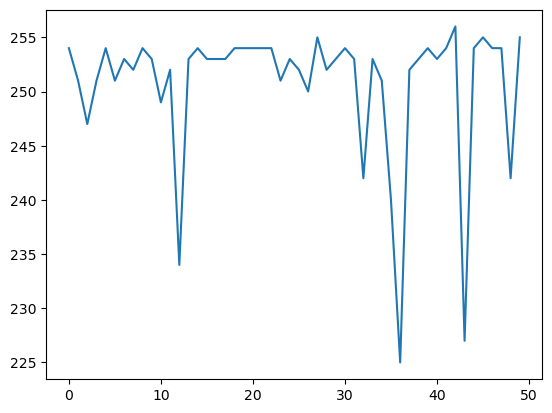

In [89]:
plt.plot(it_counts)
plt.show()

# Number of CG iterations, for varying N